### This notebook is dedicated towards preProcessing

### This notebook does three things:
<ol>
  <li>Loads in the data</li>
  <li>Normalizes it</li>
  <li>Splits it into train/test data sets</li>
</ol>

### 1) Loads in the data
We load the data using the python library pandas. The python object that holds the data is called `dataRaw`.

In [83]:
import pandas as pd

In [84]:
dataRaw = pd.read_csv('Admission_Predict.csv')
del dataRaw['Serial No.'] # Serves as a unique identifier, not needed for modeling

In [85]:
dataRaw.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### 2) Normalize it
We use the min/max normalization equation:

$$x_{new} = \frac{x_{current}-X_{min}}{X_{max}-X_{min}},$$

where $x_{current}$ is an element in column $X$ and $x_{new}$ is the updated value of $x_{current}$.

In [86]:
# We can either use min max normalization 
normalizedDataRaw = (dataRaw-dataRaw.min())/(dataRaw.max()-dataRaw.min())
# or mean std normalization.
# normalizedDataRaw = (dataRaw-dataRaw.mean())/(dataRaw.std())

In [87]:
normalizedDataRaw.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


In the cell below, we graph the histogram of each column to double-check that all of the datapoints lie within the same range. It this is not true then we have not successfully normalized our data.

We are looking at the min and max values on the x-axis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e7c4445c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4e7c1bb048>]], dtype=object)

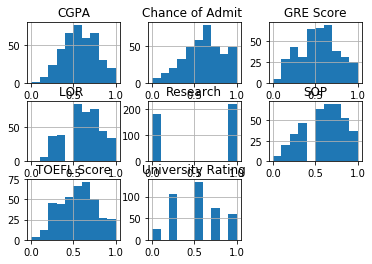

In [88]:
# Show histogram of each data column.
normalizedDataRaw.hist()

### 3) Splits it into train/test data sets
We achieve this using a library from `sklearn`. We are splitting our data 80/20. By getting the shape of our training, testing data, we ensure that each object has the right number of rows.

In [2]:
from sklearn.model_selection import train_test_split

In [89]:
# Split data
train, test = train_test_split(normalizedDataRaw, test_size=0.2)

In [90]:
train.shape

(320, 8)

In [91]:
# train.hist()

In [92]:
test.shape

(80, 8)

In [93]:
# test.hist()

In [94]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
59,0.42,0.428571,0.25,0.250,0.250,0.480769,0.0,0.126984
309,0.36,0.642857,0.75,0.625,0.500,0.576923,0.0,0.571429
328,0.68,0.714286,0.75,0.750,0.625,0.631410,1.0,0.730159
322,0.48,0.535714,0.25,0.375,0.750,0.471154,0.0,0.603175
246,0.52,0.464286,0.50,0.500,0.625,0.618590,0.0,0.603175


In [95]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
337,0.84,0.928571,1.00,1.000,1.000,0.855769,1.0,0.952381
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
188,0.82,0.821429,1.00,0.875,0.625,0.820513,1.0,0.936508
391,0.56,0.500000,0.50,0.250,0.500,0.592949,0.0,0.587302
349,0.46,0.321429,0.50,0.375,0.500,0.397436,0.0,0.444444


#### We are now ready to feed our data into the model.